In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6926406926406926
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231

Confusion Matrix:
 [[119  32]
 [ 39  41]]


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

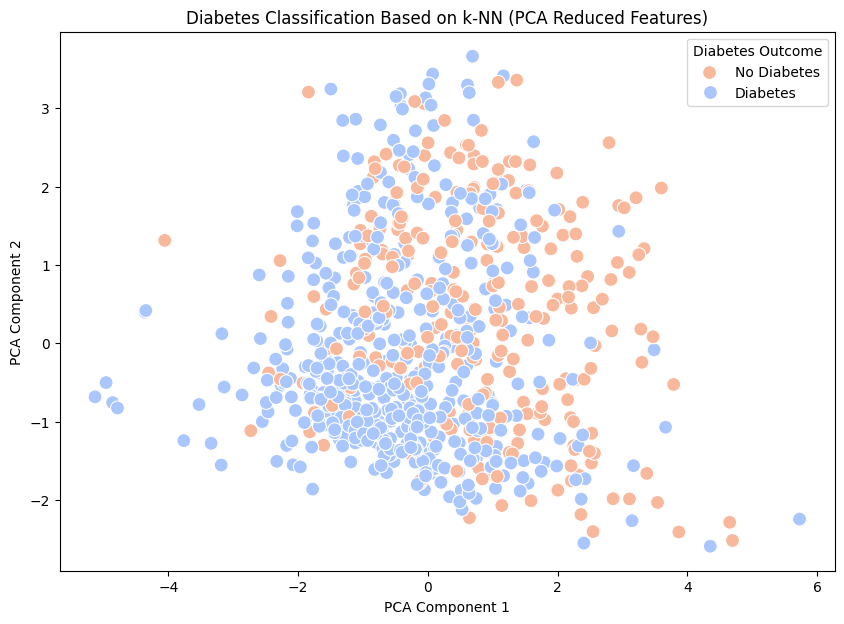

In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', s=100)
plt.title("Diabetes Classification Based on k-NN (PCA Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Diabetes Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

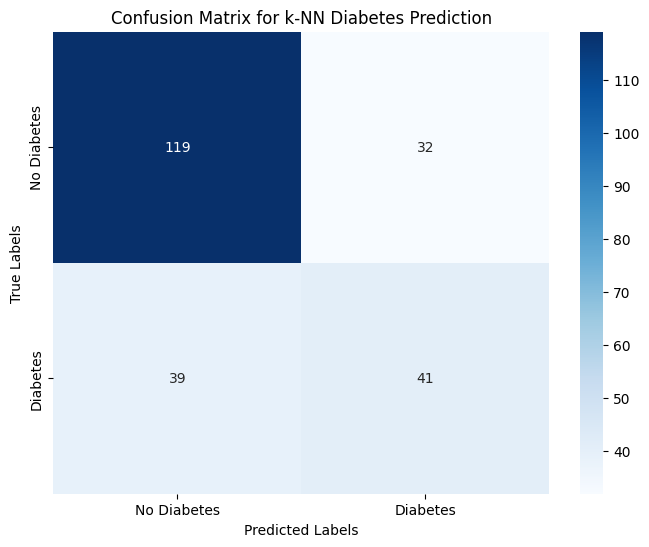

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix for k-NN Diabetes Prediction")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()